# IMD1151 - CIÊNCIAS DE DADOS - T01 (2025.1)

## 📊 Resultados do Censo Escolar 2024

**Tema:**
Números de alunos da Educação Básica na **Educação Especial** (Inclusiva ou Exclusiva)

**Fonte:**  
[gov.br - INEP - Censo Escolar 2024](https://www.gov.br/inep/pt-br/areas-de-atuacao/pesquisas-estatisticas-e-indicadores/censo-escolar/resultados)

---

**Aluno:** Douglas Alexandre dos Santos  
**Matrícula:** 20210096853


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

Carregando os dataframes com os dados já tratados

In [2]:
privadas = pd.read_csv('../data/private_school_Brazil_2024.csv', sep=';')
publicas = pd.read_csv('../data/public_school_Brazil_2024.csv', sep=';')

In [3]:
print('Número de escolar públicas: {}'.format(len(publicas)))
print('Número de escolar privadas: {}'.format(len(privadas)))

Número de escolar públicas: 136844
Número de escolar privadas: 42442


## 🎯 Problema a ser explorado

**"Há desigualdade na oferta de Educação Especial (inclusiva ou exclusiva) entre escolas públicas e privadas nas diferentes regiões do Brasil?"**

Questões sobre o perfil das escolas brasileiras, especialmente com foco na Educação Especial.

---

## 🔍 Podemos explorar...

### 📌 O perfil geral das escolas:

#### Quantas escolas (pública e privada) existem por região?

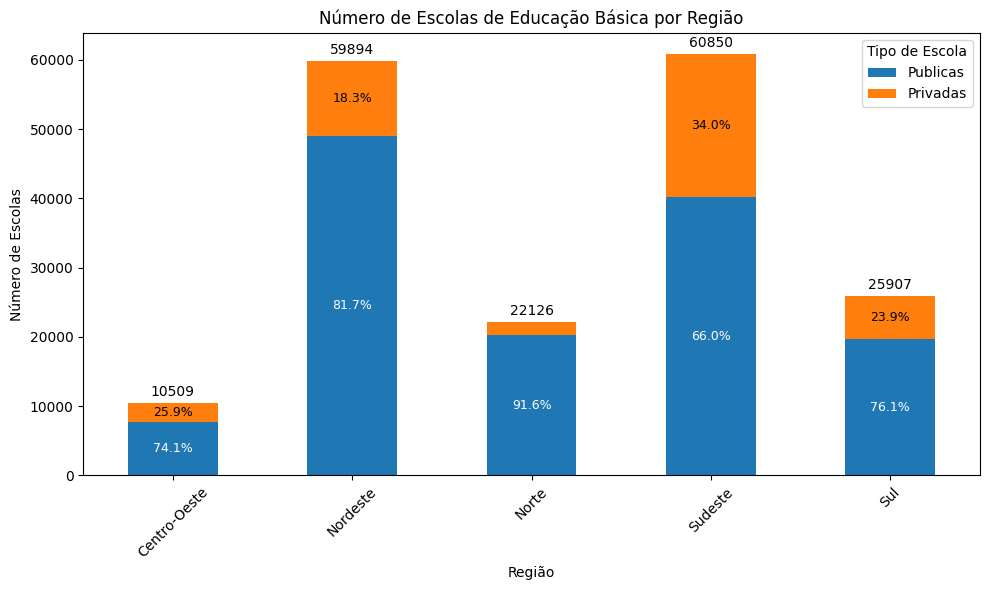

In [4]:
#Tomar cuidado com a ordem das regiões
# ['Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul']
dados = {
    "Regiao": sorted(list(set(publicas['NO_REGIAO']))),
    # a ordem dos dados influencia para associar a região
    "Publicas": publicas.groupby('NO_REGIAO')['NO_ENTIDADE'].count().to_dict().values(),
    "Privadas": privadas.groupby('NO_REGIAO')['NO_ENTIDADE'].count().to_dict().values()
}
df = pd.DataFrame(dados)

# Gráfico de barras agrupadas
ax = df[['Regiao', 'Publicas', 'Privadas']].set_index('Regiao').plot(
    kind='bar', stacked=True, figsize=(10, 6))

#Adicionar os rotulos de porcentagens nas barras
for i, (pub, priv) in enumerate(zip(df['Publicas'], df['Privadas'])):
    total = pub + priv

    # ax.text(x, y, texto, ...)
    # x - posição no eixo horizontal (a barra de cada região)
    # y - altura vertical onde o texto será colocado
    # texto - o que será escrito
    ax.text(i, pub/2, f'{(pub/total)*100:.1f}%', ha='center', va='center',
            color='white', fontsize=9)
    #Já que não tem espaço para escrever a porcentagem na terceira barra
    if(i != 2):
        ax.text(i, pub + priv/2, f'{(priv/total)*100:.1f}%', ha='center', va='center',
            color='black', fontsize=9)
    #Rotulo superior onde será exibido a quantidade absoluta de escolas
    ax.text(i, pub + priv + 1000, f'{pub+priv}', ha='center', fontsize=10)

# Customizando titulo, labels e legendas
plt.title("Número de Escolas de Educação Básica por Região")
plt.ylabel("Número de Escolas")
plt.xlabel("Região")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Escola")
plt.tight_layout()
plt.show()

#### Quantas escolas (pública e privada) existem por Estado?

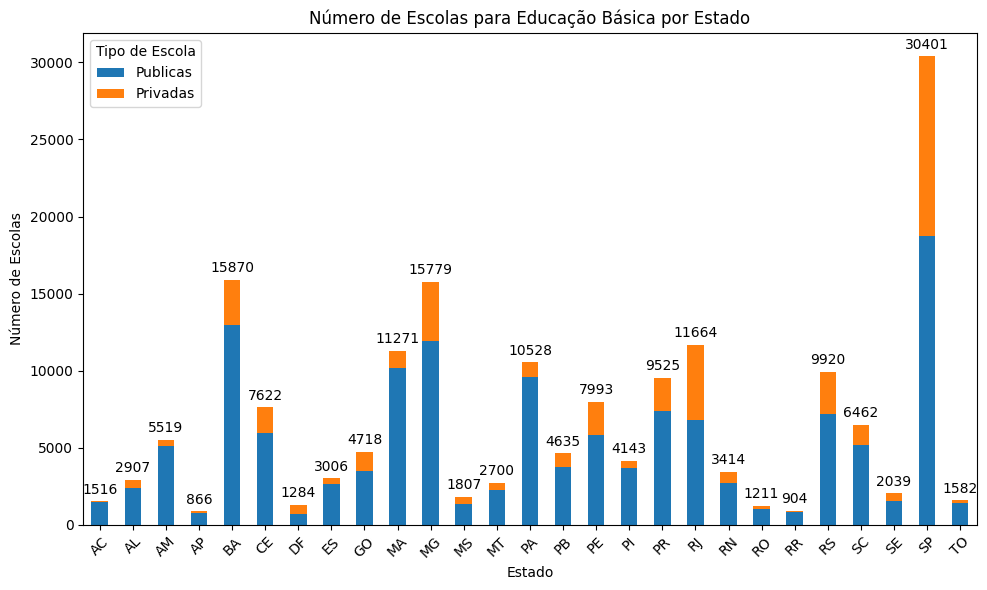

In [5]:
#Tomar cuidado com a ordem das regiões
dados = {
    "Regiao": sorted(list(set(publicas['SG_UF']))),
    # a ordem dos dados influencia para associar a região
    "Publicas": publicas.groupby('SG_UF')['NO_ENTIDADE'].count().to_dict().values(),
    "Privadas": privadas.groupby('SG_UF')['NO_ENTIDADE'].count().to_dict().values()
}
df = pd.DataFrame(dados)
df.set_index("Regiao", inplace=True)

# Gráfico de barras agrupadas
ax = df.plot(kind='bar', figsize=(10, 6), stacked=True)
for i, (pub, priv) in enumerate(zip(df['Publicas'], df['Privadas'])):
    ax.text(i, pub/2, '')
    ax.text(i, pub + priv + 500, f'{pub+priv}', ha='center', color='black', fontsize=10)
plt.title("Número de Escolas para Educação Básica por Estado")
plt.ylabel("Número de Escolas")
plt.xlabel("Estado")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Escola")
plt.tight_layout()
plt.show()

#### Qual o número médio de matrículas por escola?

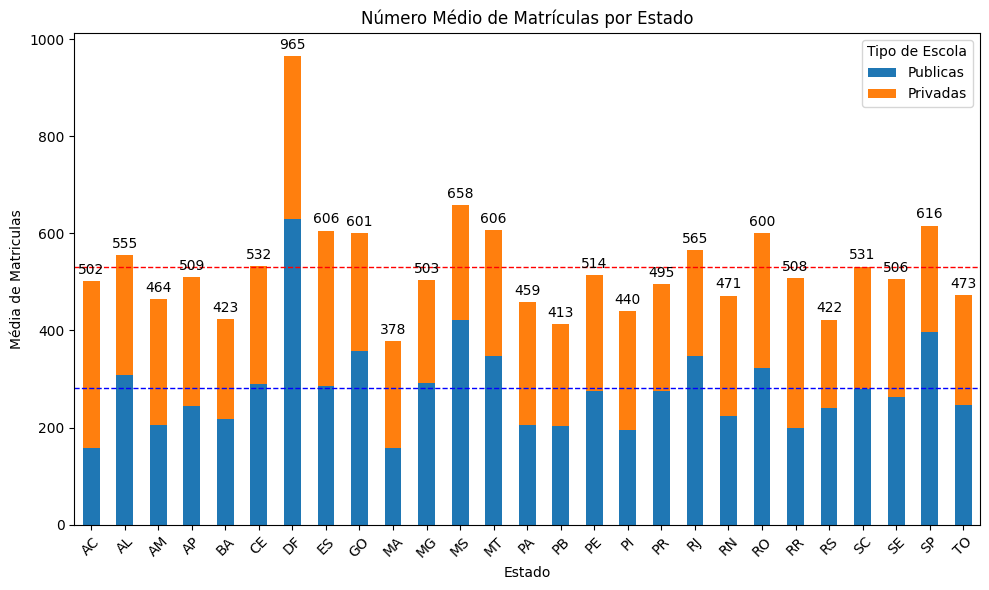

In [7]:
#Tomar cuidado com a ordem das regiões
dados = {
    "Regiao": sorted(list(set(publicas['SG_UF']))),
    # a ordem dos dados influencia para associar a região
    "Publicas": publicas.groupby('SG_UF')['QT_MAT_BAS'].mean().to_dict().values(),
    "Privadas": privadas.groupby('SG_UF')['QT_MAT_BAS'].mean().to_dict().values()
}
df = pd.DataFrame(dados)
df.set_index("Regiao", inplace=True)
# Gráfico de barras agrupadas
ax = df.plot(kind='bar', figsize=(10, 6), stacked=True)
# Calculando a média da média de matriculas das escolas
media_pub = sum(dados['Publicas']) / len(dados['Publicas'])
media_todas = (sum(dados['Publicas']) + sum(dados['Privadas'])) / len(dados['Publicas'])
# ax.axhline() - linha horizontal
ax.axhline(y=media_pub, color='blue', linestyle='--', linewidth=1)
for i, (pub, priv) in enumerate(zip(df['Publicas'], df['Privadas'])):
    ax.text(i, pub/2, '')
    ax.text(i, pub + priv + 15, f'{pub+priv:.0f}', ha='center', color='black', fontsize=10)
plt.title("Número Médio de Matrículas por Estado")
plt.ylabel("Média de Matriculas")
plt.xlabel("Estado")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Escola")
plt.tight_layout()
plt.show()

### 🧠 Educação Especial
- Qual a proporção de escolas com classes comuns x classes especiais?
- Qual a distribuição dos docentes e das turmas de Educação Especial?

#### Quantas escolas NÃO oferecem Educação Especial, por região?

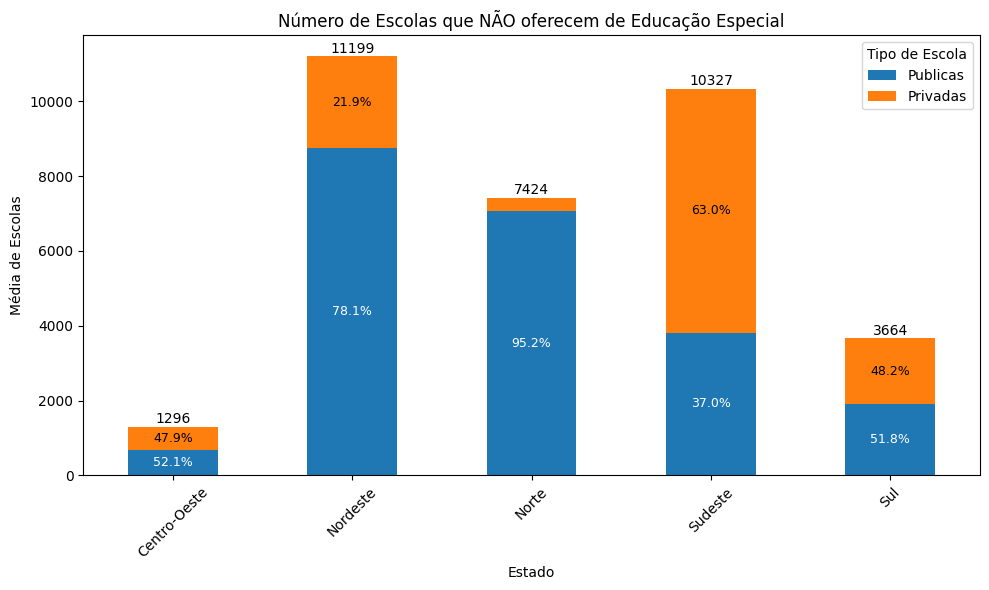

In [9]:
#Tomar cuidado com a ordem das regiões
dados = {
    "Regiao": sorted(list(set(publicas['NO_REGIAO']))),
    # == 0 - Não oferece Educação Especial
    "Publicas": publicas[publicas['IN_ESP'] == 0].groupby('NO_REGIAO')['IN_ESP'].count().to_dict().values(),
    "Privadas": privadas[privadas['IN_ESP'] == 0].groupby('NO_REGIAO')['IN_ESP'].count().to_dict().values(),
}
df = pd.DataFrame(dados)
df.set_index("Regiao", inplace=True)
# Gráfico de barras agrupadas
ax = df.plot(kind='bar', figsize=(10, 6), stacked=True)
#Adicionar os rotulos de porcentagens nas barras
for i, (pub, priv) in enumerate(zip(df['Publicas'], df['Privadas'])):
    total = pub + priv

    # ax.text(x, y, texto, ...)
    # x - posição no eixo horizontal (a barra de cada região)
    # y - altura vertical onde o texto será colocado
    # texto - o que será escrito
    ax.text(i, pub/2, f'{(pub/total)*100:.1f}%', ha='center', va='center',
            color='white', fontsize=9)
    #Já que não tem espaço para escrever a porcentagem na terceira barra
    if(i != 2):
        ax.text(i, pub + priv/2, f'{(priv/total)*100:.1f}%', ha='center', va='center',
            color='black', fontsize=9)
    #Rotulo superior onde será exibido a quantidade absoluta de escolas
    ax.text(i, pub + priv + 100, f'{pub+priv}', ha='center', fontsize=10)
plt.title("Número de Escolas que NÃO oferecem de Educação Especial")
plt.ylabel("Média de Escolas")
plt.xlabel("Estado")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Escola")
plt.tight_layout()
plt.show()


#    Observações sobre o grafico:
#
#    No Nordeste:
#        - a região com o maior número de escola sem inclusão
#        - a maioria das escolas publicas NÃO oferecem educação especial
#    No Sudeste:
#        - a maioria das escolas PRIVADAS não oferecem educação especial
#    No Centro-Oeste:
#        - tem o menor total de escolas sem inclusão

#### Quantas escolas oferecem Educação Especial, por estado?

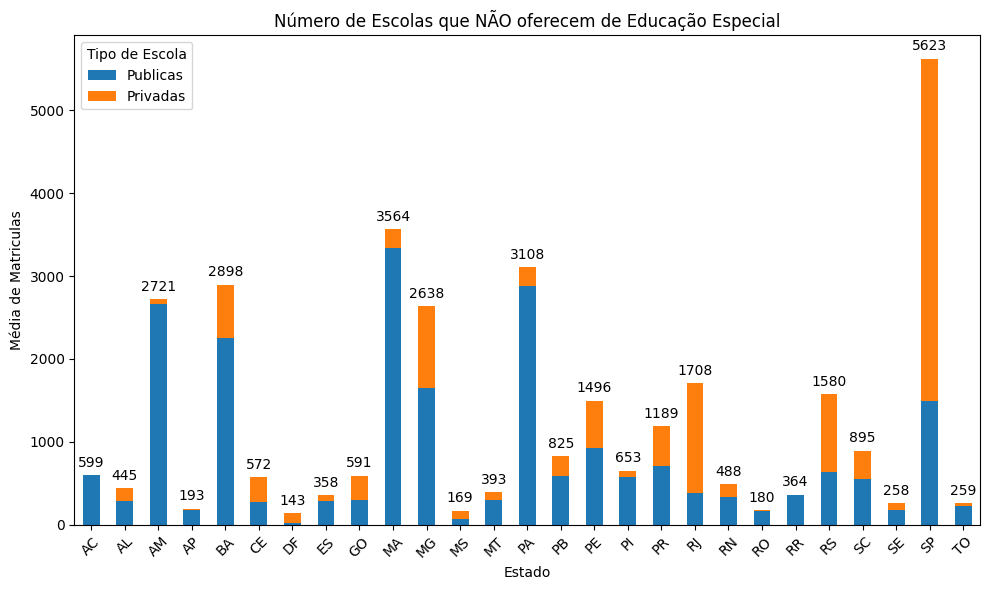

In [10]:
#Tomar cuidado com a ordem das regiões
dados = {
    "Regiao": sorted(list(set(publicas['SG_UF']))),
    # a ordem dos dados influencia para associar a região
    "Publicas": publicas[publicas['IN_ESP'] == 0].groupby('SG_UF')['IN_ESP'].count().to_dict().values(),
    "Privadas": privadas[privadas['IN_ESP'] == 0].groupby('SG_UF')['IN_ESP'].count().to_dict().values(),
}
df = pd.DataFrame(dados)
df.set_index("Regiao", inplace=True)
# Gráfico de barras agrupadas
ax = df.plot(kind='bar', figsize=(10, 6), stacked=True)
for i, (pub, priv) in enumerate(zip(df['Publicas'], df['Privadas'])):
    ax.text(i, pub/2, '')
    ax.text(i, pub + priv + 100, f'{pub+priv}', ha='center', color='black', fontsize=10)
plt.title("Número de Escolas que NÃO oferecem de Educação Especial")
plt.ylabel("Média de Matriculas")
plt.xlabel("Estado")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Escola")
plt.tight_layout()
plt.show()

#### Qual o total de matrículas na Educação Especial por região?

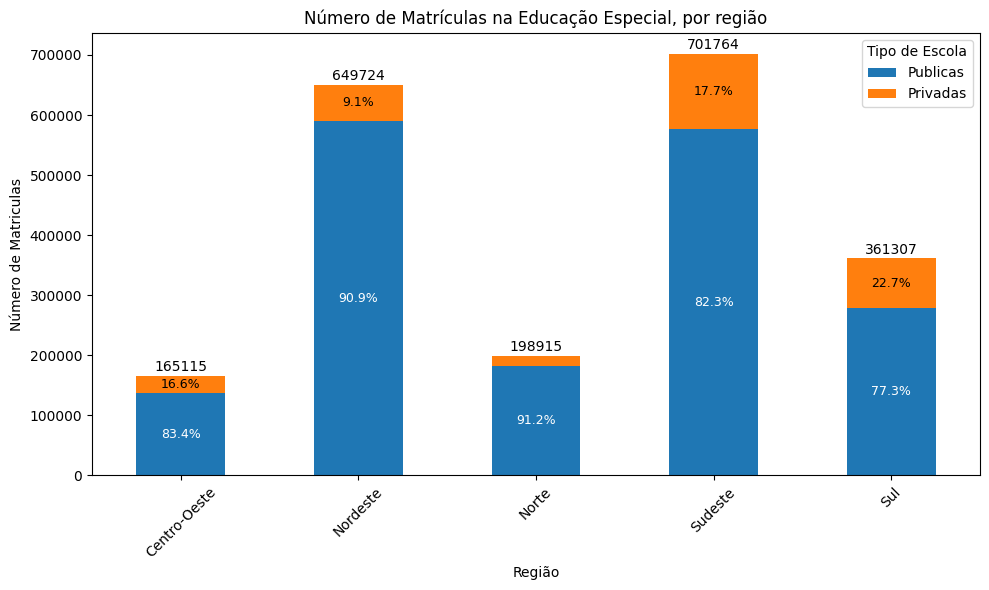

In [11]:
#Tomar cuidado com a ordem das regiões
dados = {
    "Regiao": sorted(list(set(publicas['NO_REGIAO']))),
    # a ordem dos dados influencia para associar a região
    "Publicas": publicas[publicas['IN_ESP'] == 1].groupby('NO_REGIAO')['QT_MAT_ESP'].sum().to_dict().values(),
    "Privadas": privadas[privadas['IN_ESP'] == 1].groupby('NO_REGIAO')['QT_MAT_ESP'].sum().to_dict().values()
}
df = pd.DataFrame(dados)
df.set_index("Regiao", inplace=True)
# Gráfico de barras agrupadas
ax = df.plot(kind='bar', figsize=(10, 6), stacked=True)
#Adicionar os rotulos de porcentagens nas barras
for i, (pub, priv) in enumerate(zip(df['Publicas'], df['Privadas'])):
    total = pub + priv

    # ax.text(x, y, texto, ...)
    # x - posição no eixo horizontal (a barra de cada região)
    # y - altura vertical onde o texto será colocado
    # texto - o que será escrito
    ax.text(i, pub/2, f'{(pub/total)*100:.1f}%', ha='center', va='center',
            color='white', fontsize=9)
    #Já que não tem espaço para escrever a porcentagem na terceira barra
    if(i != 2):
        ax.text(i, pub + priv/2, f'{(priv/total)*100:.1f}%', ha='center', va='center',
            color='black', fontsize=9)
    #Rotulo superior onde será exibido a quantidade absoluta de escolas
    ax.text(i, pub + priv + 8000, f'{pub+priv:.0f}', ha='center', fontsize=10)
plt.title("Número de Matrículas na Educação Especial, por região")
plt.ylabel("Número de Matriculas")
plt.xlabel("Região")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Escola")
plt.tight_layout()
plt.show()

#### Qual o total de matrículas na Educação Especial por estado?

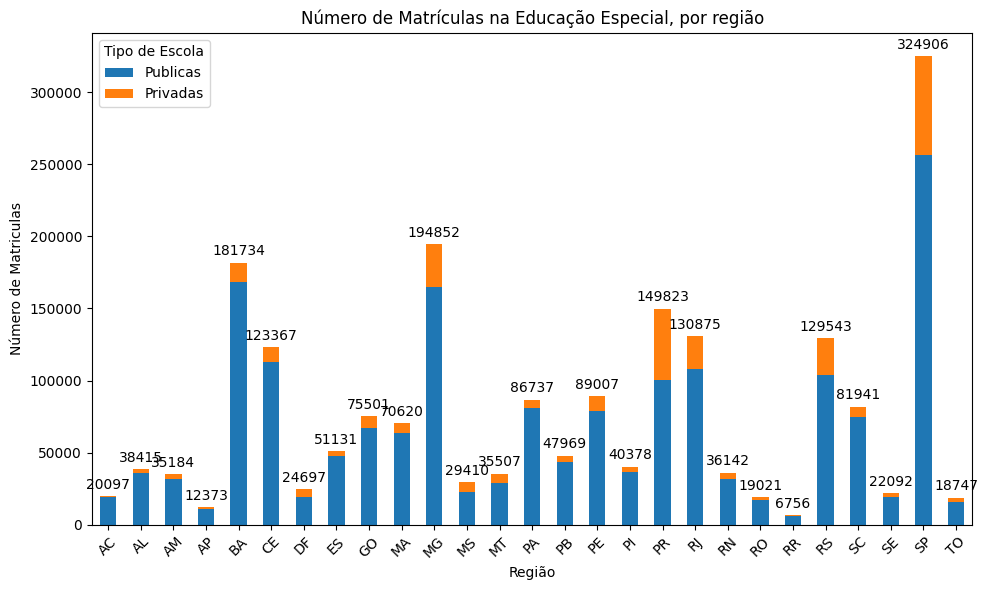

In [14]:
#Tomar cuidado com a ordem das regiões
dados = {
    "Regiao": sorted(list(set(publicas['SG_UF']))),
    # a ordem dos dados influencia para associar a região
    "Publicas": publicas[publicas['IN_ESP'] == 1].groupby('SG_UF')['QT_MAT_ESP'].sum().to_dict().values(),
    "Privadas": privadas[privadas['IN_ESP'] == 1].groupby('SG_UF')['QT_MAT_ESP'].sum().to_dict().values()
}
df = pd.DataFrame(dados)
df.set_index("Regiao", inplace=True)
# Gráfico de barras agrupadas
ax = df.plot(kind='bar', figsize=(10, 6), stacked=True)
for i, (pub, priv) in enumerate(zip(df['Publicas'], df['Privadas'])):
    ax.text(i, pub/2, '')
    ax.text(i, pub + priv + 5000, f'{pub+priv:.0f}', ha='center', color='black', fontsize=10)
plt.title("Número de Matrículas na Educação Especial, por região")
plt.ylabel("Número de Matriculas")
plt.xlabel("Região")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Escola")
plt.tight_layout()
plt.show()

#### Qual o número médio de matriculas especiais por escolas que a oferecem?

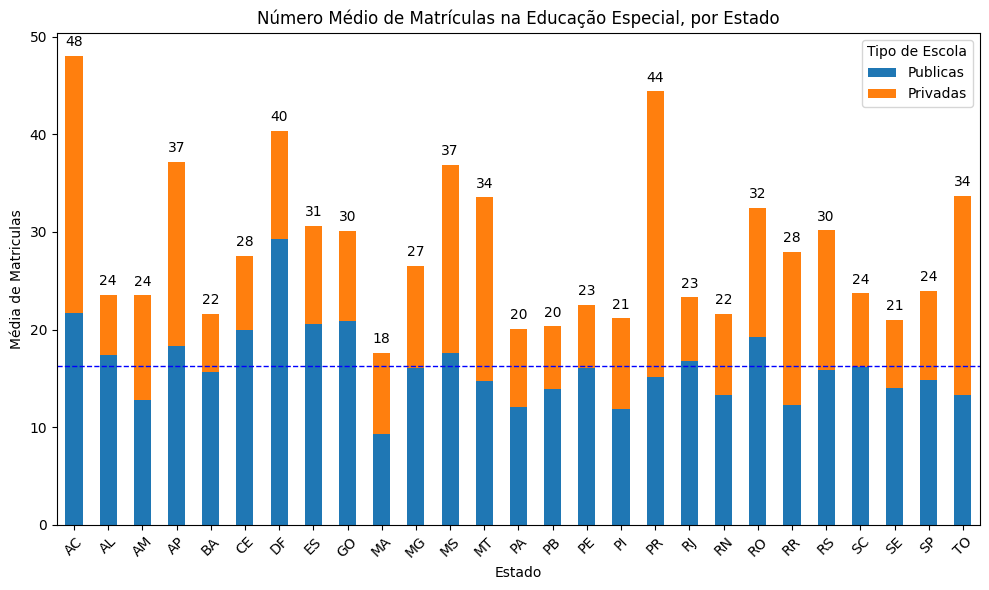

In [19]:
#Tomar cuidado com a ordem das regiões
dados = {
    "Regiao": sorted(list(set(publicas['SG_UF']))),
    # a ordem dos dados influencia para associar a região
    "Publicas": publicas[publicas['IN_ESP'] == 1].groupby('SG_UF')['QT_MAT_ESP'].mean().to_dict().values(),
    "Privadas": privadas[privadas['IN_ESP'] == 1].groupby('SG_UF')['QT_MAT_ESP'].mean().to_dict().values()
}
df = pd.DataFrame(dados)
df.set_index("Regiao", inplace=True)
# Gráfico de barras agrupadas
ax = df.plot(kind='bar', figsize=(10, 6), stacked=True)
# Calculando a média da média de matriculas das escolas
media_pub = sum(dados['Publicas']) / len(dados['Publicas'])
media_todas = (sum(dados['Publicas']) + sum(dados['Privadas'])) / len(dados['Publicas'])
# ax.axhline() - linha horizontal
ax.axhline(y=media_pub, color='blue', linestyle='--', linewidth=1)
for i, (pub, priv) in enumerate(zip(df['Publicas'], df['Privadas'])):
    ax.text(i, pub/2, '')
    ax.text(i, pub + priv+1, f'{pub+priv:.0f}', ha='center', color='black', fontsize=10)
plt.title("Número Médio de Matrículas na Educação Especial, por Estado")
plt.ylabel("Média de Matriculas")
plt.xlabel("Estado")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Escola")
plt.tight_layout()
plt.show()



---

### 🧒 Educação Infantil e Fundamental
- Qual a distribuição das modalidades entre as escolas públicas e privadas?

### ⚖️ Comparativos entre escolas públicas e privadas
- Qual a média de alunos por escola pública x privada?
- A Educação Especial é mais oferecida em escolas públicas ou privadas?
- Em quais estados há maior participação da rede privada na Educação Infantil?

---

### 📊 Indicadores e relações
- Qual a razão aluno/docente em escolas com Educação Especial?
- Existe correlação entre o número de turmas e o número de matrículas?
- Há diferenças significativas entre regiões no acesso à Educação Especial?
